In [1]:
# Importing necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

%matplotlib inline

In [2]:
# Importing data
data = pd.read_csv('accepted_2007_to_2018Q4.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Data exploration
pd.set_option('display.max_columns', 999)
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


In [5]:
# This is big data set. For the purpose of prototyping, I will downsample the number of rows and columns.
# Later on, I will scale up using the entire data set.

select_columns = ['loan_status','loan_amnt','int_rate','installment','sub_grade','emp_length', 'issue_d', \
                  'home_ownership','annual_inc','verification_status','purpose','zip_code','addr_state', \
                  'dti','delinq_2yrs','earliest_cr_line','fico_range_low','fico_range_high','inq_last_6mths', \
                  'mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util', \
                  'total_acc','collections_12_mths_ex_med','mths_since_last_major_derog','annual_inc_joint', \
                  'dti_joint','acc_now_delinq','tot_coll_amt', 'tot_cur_bal','open_acc_6m','open_act_il', \
                  'open_il_12m','open_il_24m']

minidata = data[select_columns].sample(frac=0.01, random_state=34)
minidata.head()

,loan_status,loan_amnt,int_rate,installment,sub_grade,emp_length,issue_d,home_ownership,annual_inc,verification_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m
923289,Fully Paid,10000.0,9.93,322.35,B2,4 years,May-2017,MORTGAGE,44000.0,Not Verified,debt_consolidation,321xx,FL,7.64,0.0,Dec-2004,665.0,669.0,0.0,32.0,NaN,11.0,0.0,8657.0,33.4,29.0,0.0,32.0,NaN,NaN,0.0,803.0,84974.0,0.0,0.0,0.0,0.0
1975210,Charged Off,24000.0,8.99,763.09,B1,2 years,Aug-2016,MORTGAGE,151000.0,Not Verified,credit_card,194xx,PA,14.76,2.0,Nov-2003,665.0,669.0,0.0,8.0,NaN,11.0,0.0,17960.0,99.8,21.0,0.0,46.0,NaN,NaN,0.0,0.0,452624.0,0.0,4.0,0.0,2.0
1180987,Charged Off,8200.0,18.99,300.54,E1,1 year,Oct-2014,RENT,40000.0,Verified,debt_consolidation,850xx,AZ,27.15,0.0,Mar-2008,685.0,689.0,0.0,NaN,NaN,8.0,0.0,7354.0,54.1,10.0,0.0,NaN,NaN,NaN,0.0,0.0,25862.0,NaN,NaN,NaN,NaN
2231839,Current,10000.0,11.39,329.24,B3,6 years,Oct-2016,RENT,72000.0,Source Verified,credit_card,604xx,IL,20.83,0.0,Nov-1996,670.0,674.0,0.0,NaN,71.0,12.0,1.0,13822.0,54.4,27.0,0.0,NaN,NaN,NaN,0.0,0.0,46564.0,0.0,1.0,0.0,1.0
422670,Fully Paid,5000.0,24.84,198.38,E3,10+ years,Mar-2018,RENT,78546.0,Not Verified,small_business,722xx,AR,24.45,0.0,Jan-1987,660.0,664.0,1.0,52.0,61.0,8.0,1.0,12009.0,49.0,23.0,0.0,83.0,NaN,NaN,0.0,0.0,57299.0,1.0,4.0,1.0,2.0


In [6]:
minidata.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m
count,22607.000000,22607.000000,22607.000000,2.260700e+04,22590.000000,22606.000000,22607.000000,22607.000000,22606.000000,11137.000000,3664.000000,22606.000000,22606.000000,22607.000000,22589.000000,22606.000000,22605.000000,5856.000000,1159.000000,1159.000000,22606.000000,21903.000000,2.190300e+04,14005.000000,14005.000000,14005.000000,14005.000000
mean,14970.828726,13.156220,443.972049,7.880689e+04,18.808581,0.302398,698.436767,702.436944,0.584314,34.685104,73.041758,11.596302,0.201495,16397.115274,50.279772,24.108555,0.018845,44.338115,121102.757023,19.260457,0.003406,229.943980,1.421476e+05,0.929882,2.802785,0.664905,1.573795
std,9210.431011,4.884743,268.379908,1.014774e+05,14.258861,0.854430,32.873296,32.874088,0.888691,21.985907,26.704379,5.675958,0.547144,21358.586709,24.760436,11.933124,0.152542,21.743880,69701.929733,7.780588,0.061226,2202.809651,1.585138e+05,1.148846,3.067941,0.926706,1.581748
min,1000.000000,5.310000,14.010000,0.000000e+00,0.000000,0.000000,640.000000,644.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,25236.000000,0.530000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,9.490000,249.290000,4.600000e+04,11.880000,0.000000,675.000000,679.000000,0.000000,16.000000,56.000000,8.000000,0.000000,5831.500000,31.200000,15.000000,0.000000,27.000000,82553.500000,13.655000,0.000000,0.000000,2.931000e+04,0.000000,1.000000,0.000000,0.000000
50%,12700.000000,12.620000,375.990000,6.500000e+04,17.760000,0.000000,690.000000,694.000000,0.000000,31.000000,74.000000,11.000000,0.000000,11191.000000,50.200000,22.000000,0.000000,44.000000,109000.000000,18.560000,0.000000,0.000000,7.941500e+04,1.000000,2.000000,0.000000,1.000000
75%,20000.000000,15.990000,587.820000,9.300000e+04,24.530000,0.000000,715.000000,719.000000,1.000000,50.000000,94.000000,14.000000,0.000000,20176.000000,69.300000,31.000000,0.000000,62.000000,145000.000000,24.835000,0.000000,0.000000,2.122095e+05,1.000000,3.000000,1.000000,2.000000
max,40000.000000,30.990000,1566.800000,6.998721e+06,999.000000,21.000000,845.000000,850.000000,11.000000,160.000000,120.000000,67.000000,11.000000,585563.000000,132.400000,118.000000,5.000000,197.000000,970000.000000,39.770000,2.000000,188066.000000,2.182050e+06,12.000000,43.000000,9.000000,14.000000


In [7]:
minidata.isna().sum()
# For now I left NaN as is until I know which model I will use to analyze the data

loan_status                        0
loan_amnt                          0
int_rate                           0
installment                        0
sub_grade                          0
emp_length                      1521
issue_d                            0
home_ownership                     0
annual_inc                         0
verification_status                0
purpose                            0
zip_code                           0
addr_state                         0
dti                               17
delinq_2yrs                        1
earliest_cr_line                   1
fico_range_low                     0
fico_range_high                    0
inq_last_6mths                     1
mths_since_last_delinq         11470
mths_since_last_record         18943
open_acc                           1
pub_rec                            1
revol_bal                          0
revol_util                        18
total_acc                          1
collections_12_mths_ex_med         2
m

In [8]:
# Change some columns to categorical
categorical_columns = ['sub_grade','home_ownership','verification_status','purpose','zip_code','addr_state']
minidata[categorical_columns] = minidata[categorical_columns].astype('category')
minidata['sub_grade'] = pd.Categorical(minidata['sub_grade'], ordered=True)

In [9]:
# Change employment length to float
minidata['emp_length'] = minidata['emp_length'].astype('str')
minidata['emp_length'] = minidata['emp_length'].map(lambda x: x.rstrip(' years'))
minidata['emp_length'][minidata.emp_length == '< 1'] = '0'
minidata['emp_length'][minidata.emp_length == '10+'] = '10'
minidata['emp_length'] = minidata['emp_length'].astype('float')
for i in minidata['emp_length'].unique(): print(i)

4.0
2.0
1.0
6.0
10.0
7.0
9.0
0.0
5.0
3.0
8.0
nan


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [10]:
# Make datetime format
date_columns = ['earliest_cr_line','issue_d']
minidata[date_columns] = minidata[date_columns].apply(pd.to_datetime)
minidata[date_columns].head()

,earliest_cr_line,issue_d
923289,2004-12-01,2017-05-01
1975210,2003-11-01,2016-08-01
1180987,2008-03-01,2014-10-01
2231839,1996-11-01,2016-10-01
422670,1987-01-01,2018-03-01


Text(0.5, 0, 'Loan issued date')

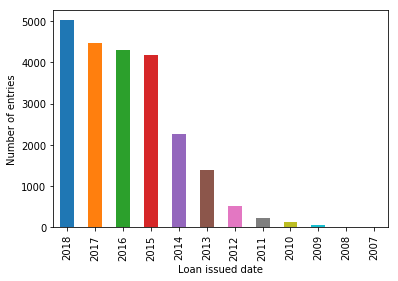

In [11]:
# Data distributions by time
minidata['issue_d'].dt.year.value_counts().plot(kind='bar')
plt.ylabel('Number of entries')
plt.xlabel('Loan issued date')

In [12]:
# Data distribution by loan status
minidata['loan_status'] = minidata['loan_status'].map(lambda x: x.lstrip('Does not meet the credit policy. Status:'))
#minidata['loan_status'] = minidata['loan_status'].map(lambda x: x.rstrip('(16-30 days)'))
#minidata['loan_status'] = minidata['loan_status'].map(lambda x: x.rstrip('(31-120 days)'))
#minidata['loan_status'] = minidata['loan_status'].astype('category')
minidata['loan_status'] = minidata['loan_status'].astype('category')

Text(0.5, 0, 'Loan issued date')

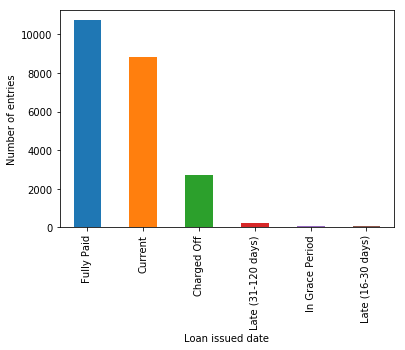

In [13]:
minidata['loan_status'].value_counts().plot(kind='bar')
plt.ylabel('Number of entries')
plt.xlabel('Loan issued date')
# imbalance sample detected, need to resample when training model

Text(0.5, 0, 'Sub-Grade')

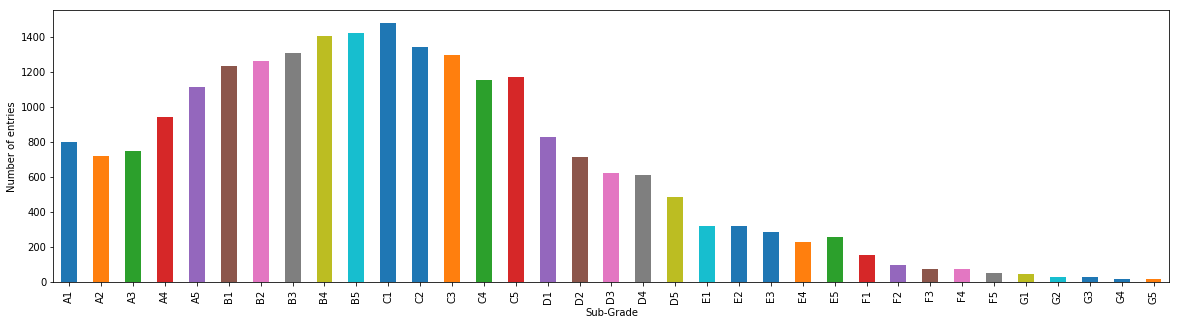

In [14]:
# Data distribution by grades
fig = plt.figure(figsize=(20,5))
minidata.groupby('sub_grade').size().plot(kind='bar')
plt.ylabel('Number of entries')
plt.xlabel('Sub-Grade')

Text(0.5, 0, 'Loan Purpose')

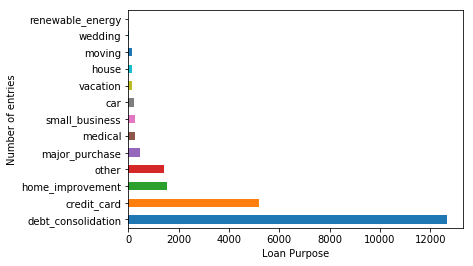

In [15]:
# Data distribution by loan purposes
minidata['purpose'].value_counts().plot(kind='barh')
plt.ylabel('Number of entries')
plt.xlabel('Loan Purpose')

Text(0.5, 0, 'States')

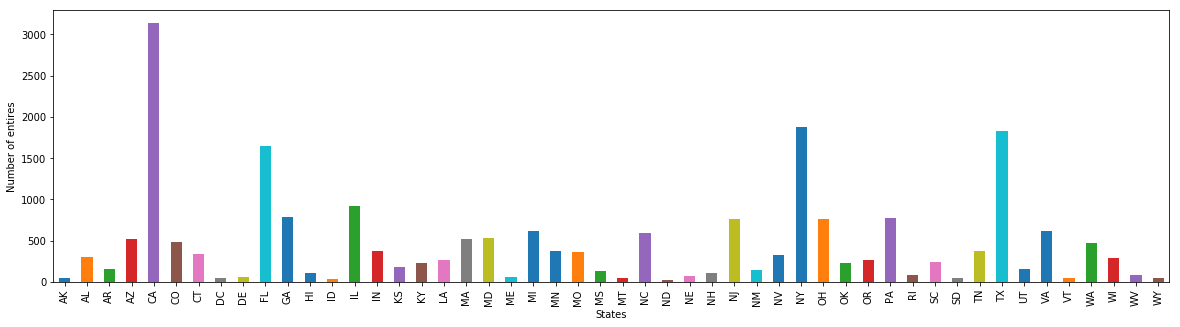

In [16]:
# Data distribution by states
fig = plt.figure(figsize=(20,5))
minidata.groupby('addr_state').size().plot(kind='bar')
plt.ylabel('Number of entires')
plt.xlabel('States')

Text(0.5, 0, 'Home Ownership')

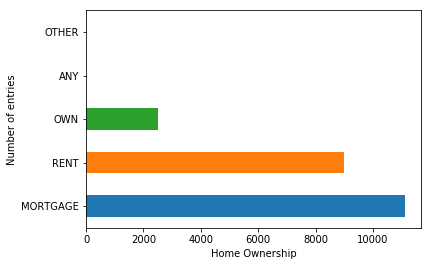

In [17]:
# Data distribution by home ownership
minidata['home_ownership'].value_counts().plot(kind='barh')
plt.ylabel('Number of entries')
plt.xlabel('Home Ownership')

Text(0.5, 0, 'Verification Status')

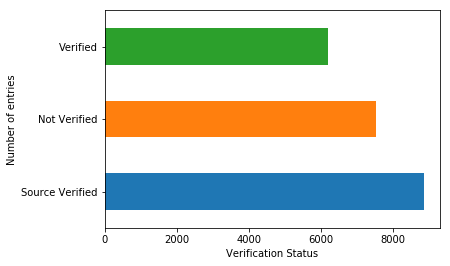

In [18]:
# Data distribution by verification status
minidata['verification_status'].value_counts().plot(kind='barh')
plt.ylabel('Number of entries')
plt.xlabel('Verification Status')